# Step 1: Load Dataset

In [28]:
#import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Load the dataset
df = pd.read_csv("Iris.csv")

# Step 2: Exploratory Data Analysis

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# Drop the 'Id' column
df = df.drop(columns =["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Step 3: Data Visualization

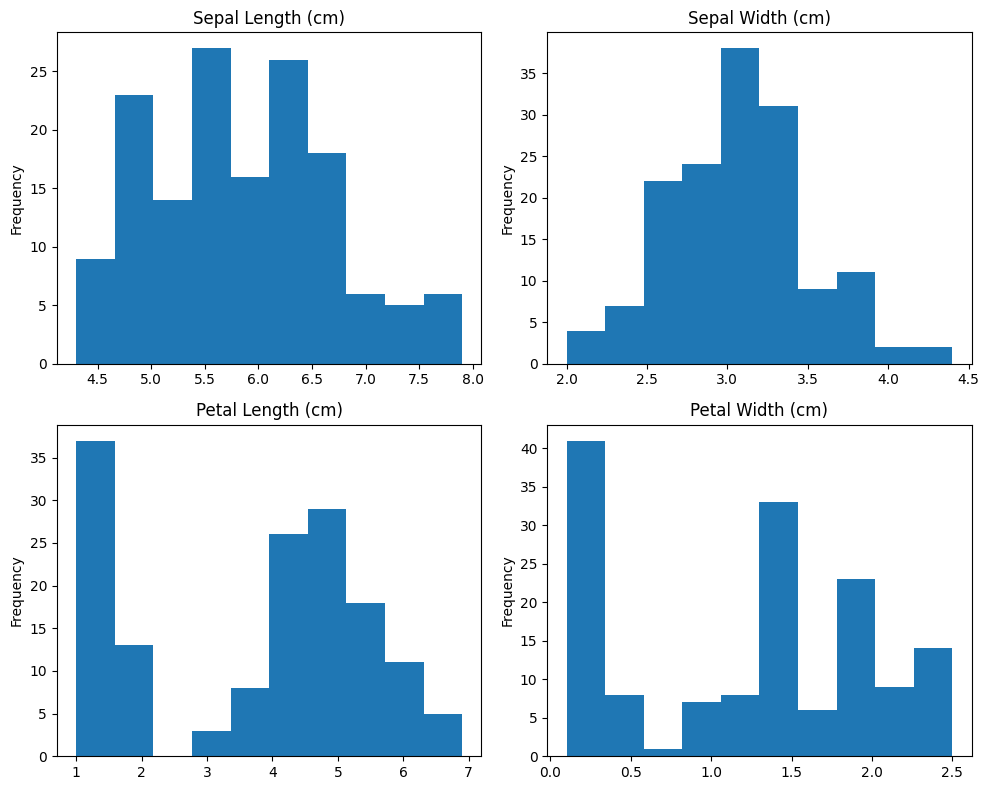

In [36]:
# Create a figure with subplots for each histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Create histograms for each column
df['SepalLengthCm'].plot(kind='hist', ax=axes[0, 0], title='Sepal Length (cm)')
df['SepalWidthCm'].plot(kind='hist', ax=axes[0, 1], title='Sepal Width (cm)')
df['PetalLengthCm'].plot(kind='hist', ax=axes[1, 0], title='Petal Length (cm)')
df['PetalWidthCm'].plot(kind='hist', ax=axes[1, 1], title='Petal Width (cm)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


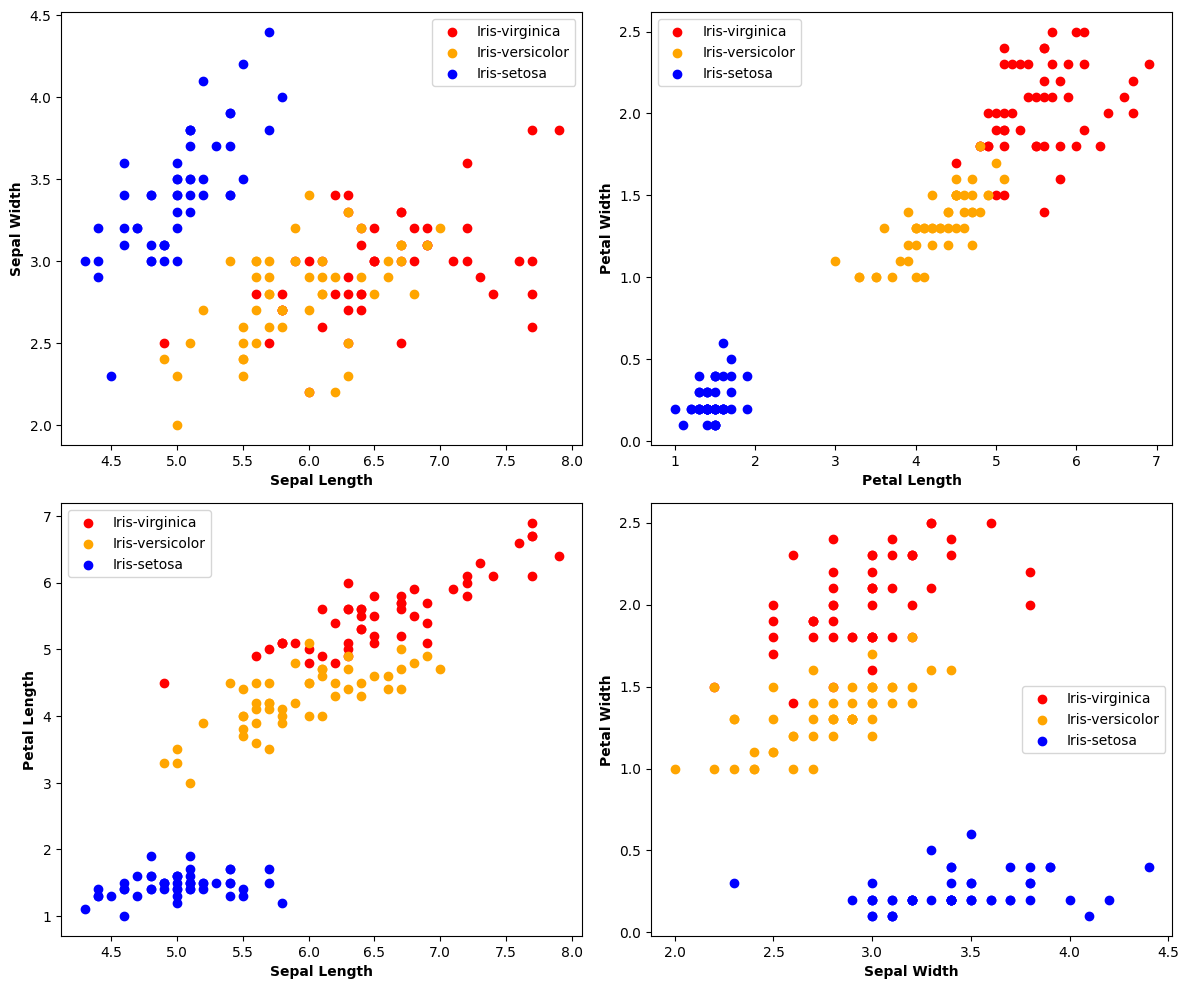

In [37]:
import matplotlib.pyplot as plt

color = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Data columns
x_columns = ['SepalLengthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']
y_columns = ['SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Labels
x_labels = ["Sepal Length", "Petal Length", "Sepal Length", "Sepal Width"]
y_labels = ["Sepal Width", "Petal Width", "Petal Length", "Petal Width"]

for i in range(4):
    ax = axes[i // 2, i % 2]
    
    for j in range(3):
        x = df[df['Species'] == species[j]]
        ax.scatter(x[x_columns[i]], x[y_columns[i]], c=color[j], label=species[j])

    ax.set_xlabel(x_labels[i], fontweight="bold")
    ax.set_ylabel(y_labels[i], fontweight="bold")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Step 4: Data Preprocessing

In [38]:
# Encode the 'Species' column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [39]:
# Split the data into features and target
X = df.drop(columns=["Species"])
y = df['Species']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(report)
    print("\n")

Model: Logistic Regression
Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Model: K-Nearest Neighbors
Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Model: Decision Tree
Accuracy: 100.00%
                 precision    recall  f1-score   support

    I